# Clustering

In [1]:
import util
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

conn, cur = util.connexion()

## Etude des corrélations

In [2]:
df = pd.read_sql_query('SELECT titre, public."NbPassagesMC"(titre,current_date), public."NbPassages50"(titre,current_date),	public."NbPassages40"(titre,current_date), public."NbPassages30"(titre,current_date), public."NbPassages20"(titre,current_date), public."NbPassages20k"(titre,current_date) FROM public."Chanson"',con=conn)
df

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k
0,Pour la peine,0,1,1,2,1,3
1,2 be 3,0,3,0,1,0,3
2,C'est ma vie,0,0,1,0,0,2
3,Les filles du bord de mer,0,0,0,0,2,2
4,Tombe la neige,0,0,0,1,1,0
...,...,...,...,...,...,...,...
2223,Un endroit pour vivre,0,0,0,0,1,0
2224,Mustapha,0,0,0,0,1,0
2225,Dans mes bras,0,0,0,1,0,0
2226,XY,0,0,1,0,0,0


In [3]:
df[df["titre"] == "Viens voir le docteur"]

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k
464,Viens voir le docteur,0,0,0,0,2,1


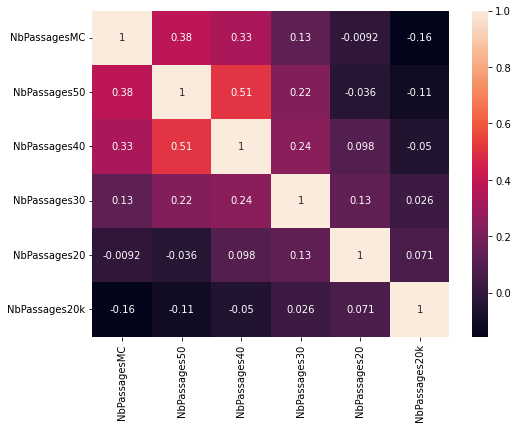

In [4]:
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Clustering

### KMeans

In [5]:
titres = ['Envole-moi', 'Allumer le feu', 'Évidemment (France Gall)', 'Au fur et à mesure']
df[df['titre'].isin(titres)]

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k
563,Au fur et à mesure,1,0,1,0,2,1
646,Évidemment (France Gall),3,0,1,1,1,0
692,Envole-moi,2,5,2,0,0,2
2173,Allumer le feu,1,4,3,3,0,0


In [6]:
kmeans = KMeans(n_clusters=3).fit(df[['NbPassagesMC','NbPassages50','NbPassages40','NbPassages30','NbPassages20','NbPassages20k']])
centroids = kmeans.cluster_centers_
print(centroids)


df['cluster'] = kmeans.labels_

for i in range(3):
    nbChansonsCluster = df[df['cluster'] == i]['titre'].count()
    print("Nombre de chansons dans la classe {0} : {1}".format(i, nbChansonsCluster))

df.sample(15)

[[0.1510989  0.30677656 0.51282051 0.80311355 1.09981685 0.27472527]
 [2.         3.68972332 2.85968379 1.90118577 1.11264822 0.6541502 ]
 [0.12063492 0.47777778 0.77777778 1.04285714 1.27936508 2.98253968]]
Nombre de chansons dans la classe 0 : 1092
Nombre de chansons dans la classe 1 : 506
Nombre de chansons dans la classe 2 : 630


,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
686,Ville de lumière,0,2,0,1,3,2,2
900,Macao,0,0,0,0,1,3,2
2003,L'hymne à l'amour,3,0,0,0,1,1,0
1771,Paris sera toujours Paris,0,0,0,0,1,0,0
1967,Métis(se),0,0,0,1,0,1,0
1072,Nos secrets,0,1,2,3,3,0,0
128,Soulman,5,7,1,0,0,1,1
1979,Presse qui roule,0,0,1,1,0,2,2
492,Aller plus haut,3,2,5,3,0,0,1
401,La fleur aux dents,0,3,2,0,3,1,1


In [7]:
n = int(input())

kmeans = KMeans(n_clusters=n).fit(df[['NbPassagesMC','NbPassages50','NbPassages40','NbPassages30','NbPassages20','NbPassages20k']])
centroids = kmeans.cluster_centers_
print(centroids)

df['cluster'] = kmeans.labels_



[[0.19891008 1.2506812  1.92643052 2.31880109 2.49591281 0.97820163]
 [4.0195122  2.0097561  2.38536585 1.71219512 1.1902439  0.62439024]
 [0.0464684  0.42193309 0.64498141 0.8605948  1.03159851 3.09479554]
 [1.1981982  5.45045045 2.94594595 1.56306306 0.72522523 0.62612613]
 [0.07254464 0.21763393 0.33482143 0.54017857 0.77455357 0.24441964]]


In [8]:
for i in range(n):
    nbChansonsCluster = df[df['cluster'] == i]['titre'].count()
    print("Nombre de chansons dans la classe {0} : {1}".format(i, nbChansonsCluster))

df[df["titre"] == "Toi mon amour"]

Nombre de chansons dans la classe 0 : 367
Nombre de chansons dans la classe 1 : 205
Nombre de chansons dans la classe 2 : 538
Nombre de chansons dans la classe 3 : 222
Nombre de chansons dans la classe 4 : 896


,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
897,Toi mon amour,0,1,0,2,3,2,0


On détermine dans chaque cluster combien il y a de mêmes chansons, de 20k et de random

In [9]:
for c in range(n):
    total = df[df['cluster']==c]['titre'].count()
    mc = df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)]['titre'].count()
    vingtk = df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
    reste = df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
    print("Pour le cluster {0} qui contient {1} chansons".format(c, total))
    print("Nombre de MC : {0}".format(mc))
    print("Nombre de 20k : {0}".format(vingtk))
    print("Nombre de random : {0}".format(reste))
    print("Proportion 20k : {0}".format(round(vingtk/total,3)))
    print()

Pour le cluster 0 qui contient 367 chansons
Nombre de MC : 52
Nombre de 20k : 185
Nombre de random : 130
Proportion 20k : 0.504

Pour le cluster 1 qui contient 205 chansons
Nombre de MC : 205
Nombre de 20k : 0
Nombre de random : 0
Proportion 20k : 0.0

Pour le cluster 2 qui contient 538 chansons
Nombre de MC : 19
Nombre de 20k : 519
Nombre de random : 0
Proportion 20k : 0.965

Pour le cluster 3 qui contient 222 chansons
Nombre de MC : 100
Nombre de 20k : 67
Nombre de random : 55
Proportion 20k : 0.302

Pour le cluster 4 qui contient 896 chansons
Nombre de MC : 41
Nombre de 20k : 201
Nombre de random : 654
Proportion 20k : 0.224



### Etude des clusters

205


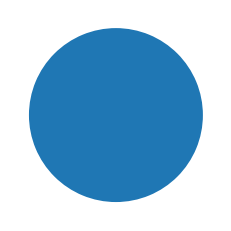

In [10]:
c = int(input())
total = df[df['cluster']==c]['titre'].count()
mc = df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)]['titre'].count()
vingtk = df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
reste = df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
plt.pie([mc, vingtk, reste])
print(total)
plt.show()

Les mêmes chansons

In [11]:
df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)].sample(10)

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
424,Tomber,5,5,2,2,1,0,1
1393,Les rois mages,4,2,4,1,0,0,1
1487,Zen,4,4,3,0,0,1,1
1533,Capri c'est fini,4,2,4,1,2,1,1
2161,Non non non (Ecouter Barbara),3,3,5,2,0,2,1
1901,La grenade,5,3,6,0,3,0,1
1251,Goodbye Marylou,2,2,3,2,0,0,1
434,Quand j'étais chanteur,3,3,5,1,2,1,1
803,J'ai demandé à la lune,6,0,4,3,2,1,1
1324,Jeune et con,5,3,1,1,1,2,1


Les 20k

In [12]:
df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)].sample(10)

ValueError: a must be greater than 0 unless no samples are taken

Les random

In [ ]:
try:
    df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)].sample(10)
    ok = True
except ValueError:
    print("Il n'y a pas de chansons random dans ce cluster")
    ok = False

df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)].sample(10)

Il n'y a pas de chansons random dans ce cluster


ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
prop = np.array([203, 171, 70, 0, 493])
tot = sum(prop)
prop*100/tot

array([21.66488794, 18.24973319,  7.47065101,  0.        , 52.61472785])

## Insertion des clusters en base

In [13]:
def updateQuery(c, titre):
    titre = titre.replace("'","''")
    return "UPDATE public.\"Chanson\" SET \"clusterID\"= {} WHERE titre = '{}';".format(c, titre)

for row in df.iterrows():
    print(row[1]['titre'], " : ", row[1]['cluster'])
    print(updateQuery(row[1]['cluster'], row[1]['titre']))
    cur.execute(updateQuery(row[1]['cluster'], row[1]['titre']))
    conn.commit()

Pour la peine  :  2
UPDATE public."Chanson" SET "clusterID"= 2 WHERE titre = 'Pour la peine';
2 be 3  :  2
UPDATE public."Chanson" SET "clusterID"= 2 WHERE titre = '2 be 3';
C'est ma vie  :  2
UPDATE public."Chanson" SET "clusterID"= 2 WHERE titre = 'C''est ma vie';
Les filles du bord de mer  :  2
UPDATE public."Chanson" SET "clusterID"= 2 WHERE titre = 'Les filles du bord de mer';
Tombe la neige  :  4
UPDATE public."Chanson" SET "clusterID"= 4 WHERE titre = 'Tombe la neige';
Vous permettez Monsieur  :  2
UPDATE public."Chanson" SET "clusterID"= 2 WHERE titre = 'Vous permettez Monsieur';
Ohio  :  2
UPDATE public."Chanson" SET "clusterID"= 2 WHERE titre = 'Ohio';
Je me bats pour gagner  :  4
UPDATE public."Chanson" SET "clusterID"= 4 WHERE titre = 'Je me bats pour gagner';
Baïla  :  4
UPDATE public."Chanson" SET "clusterID"= 4 WHERE titre = 'Baïla';
Respect  :  4
UPDATE public."Chanson" SET "clusterID"= 4 WHERE titre = 'Respect';
Simple et funky  :  4
UPDATE public."Chanson" SET "cluste

In [14]:
cur.execute('SELECT id, titre, "année", id_artiste, nb_mots, "clusterID" FROM public."Chanson"')